In [2]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scanpy as sc
from bbknn import bbknn
import scanorama as scnrma
import pandas as pd

sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=300)

scanpy==1.6.0 anndata==0.7.4 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


# P14 gluta

In [33]:
P14_glut = adata_gluta[adata_gluta.obs.batch=='P14', :]
del P14_glut.obsp
del P14_glut.varm
del P14_glut.obsm
del P14_glut.uns
P14_glut.X = P14_glut.raw.X
sc.pp.highly_variable_genes(P14_glut, min_mean=0.0125, max_mean=3, min_disp=0.5) #HVGs
sc.pp.scale(P14_glut, max_value=10) #scale
sc.tl.pca(P14_glut, svd_solver='arpack') #run PCA

P14_glut_CBs = list(P14_glut.obs.index)
P14_glut_batch = []
for i in range(len(P14_glut_CBs)):
    P14_glut_batch.append(P14_glut_CBs[i][19:25])
    
P14_glut.obs['sample'] = P14_glut.obs['batch']
P14_glut.obs['sample'] = P14_glut_batch

sc.pp.neighbors(P14_glut, n_neighbors=25, n_pcs=40) #choose 25 standard for now
#bbknn(P14_glut, batch_key='sample',neighbors_within_batch=8 ) #8*3~=25
sc.tl.leiden(P14_glut)
sc.tl.umap(P14_glut)

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


In [35]:
P14_glut = P14_glut[P14_glut.obs['leiden']!='13',:]
P14_glut = P14_glut[P14_glut.obs['leiden']!='19',:]

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


<AxesSubplot:title={'center':'Batch'}, xlabel='UMAP1', ylabel='UMAP2'>

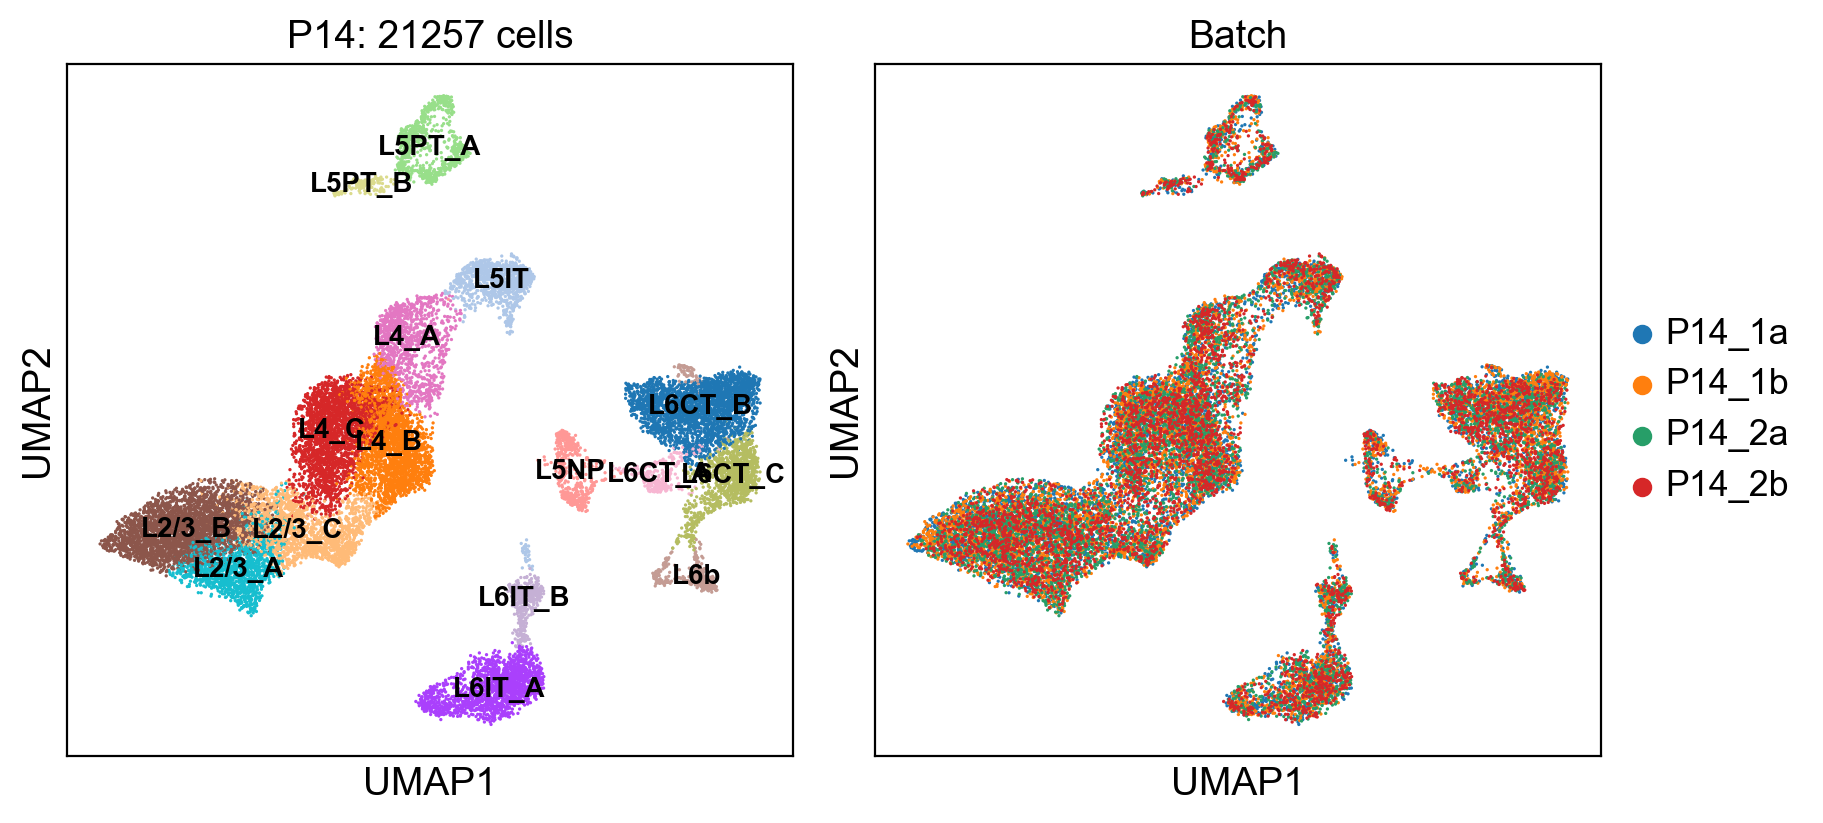

In [9]:
fig, axs = plt.subplots(1, 2, figsize = (9,4), constrained_layout=True)
sc.pl.umap(P14_glut, color='cluster',ax=axs[0], legend_fontsize='10', 
           show=False, title='P14: ' + str(P14_glut.shape[0]) + ' cells', frameon=True, 
          palette=('#17becf', '#8c564b', '#ffbb78', '#e377c2', '#ff7f0e', '#d62728', 
                  '#aec7e8', '#ff9896', '#98df8a', '#dbdb8d', '#f7b6d2', '#1f77b4', 
                  '#b5bd61', '#aa40fc', '#c5b0d5', '#c49c94'), legend_loc='on data')
sc.pl.umap(P14_glut, color='sample', ax=axs[1], show=False, title='P14: ' + str(P14_glut.shape[0]) + ' cells')

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


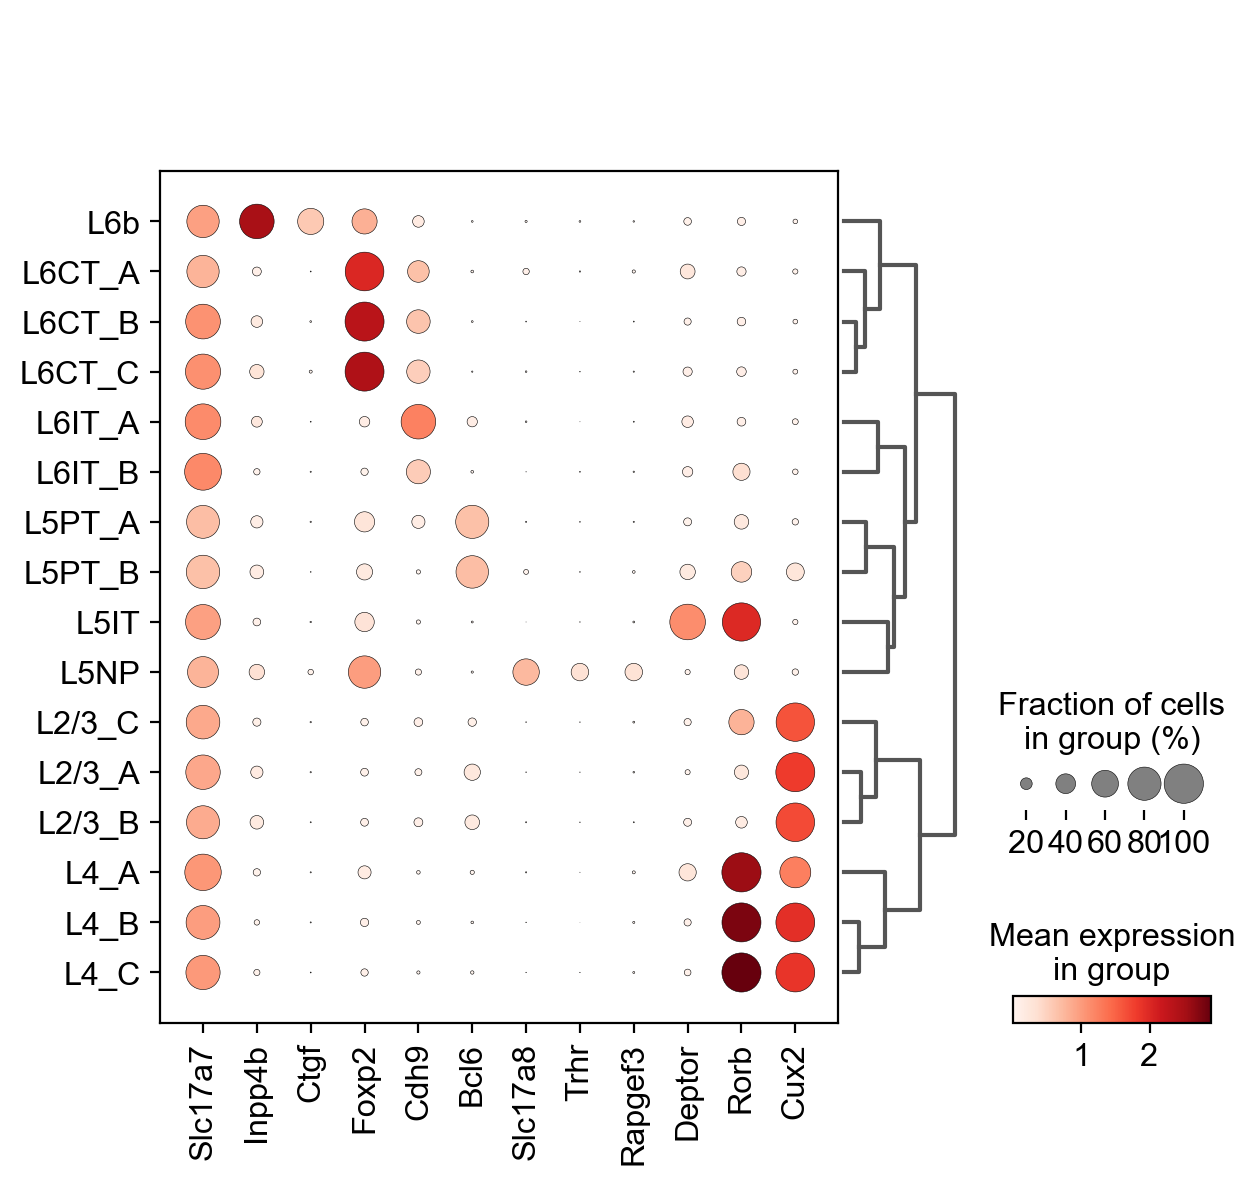

In [10]:
sc.tl.dendrogram(P14_glut, groupby='cluster')
bias_markers = ['Slc17a7', 'Inpp4b', 'Ctgf',
                'Foxp2', 'Cdh9', 'Bcl6', 'Slc17a8', 'Trhr', 'Rapgef3', 'Deptor', 'Rorb', 'Cux2']
#bias_pos = [(0,6), (7,15)]
#bias_labels = ['Neuronal', 'Non-Neuronal']
sc.pl.dotplot(P14_glut, bias_markers, groupby='cluster', dendrogram=True)

# Save

In [10]:
P14_glut.write_h5ad('P14_glut08292020.h5ad')